'''


    @Author: Shivraj Yelave
    @Date: 27-09-24
    @Last modified by: Shivraj Yelave
    @Last modified time: 
    @Title: Proprecessing Techniques


'''

### Importing Libraries


In [27]:
import numpy as np
import pandas as pd
import statistics as st
from sklearn.preprocessing import OneHotEncoder,StandardScaler,LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Load Dataset

In [57]:
df = pd.read_csv('data_preprocessing.csv')
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### 5 number summery

In [58]:
print(df.describe())
print("Median Age:", st.median(df['Age']))
print("Mode Age:", st.mode(df['Age']))

             Age        Salary
count   9.000000      9.000000
mean   38.777778  63777.777778
std     7.693793  12265.579662
min    27.000000  48000.000000
25%    35.000000  54000.000000
50%    38.000000  61000.000000
75%    44.000000  72000.000000
max    50.000000  83000.000000
Median Age: 39.0
Mode Age: 44.0


### Null values

In [59]:
null_counts = df.isnull().sum()
print(null_counts)


Country      0
Age          1
Salary       1
Purchased    0
dtype: int64


### Visualize Using graphs


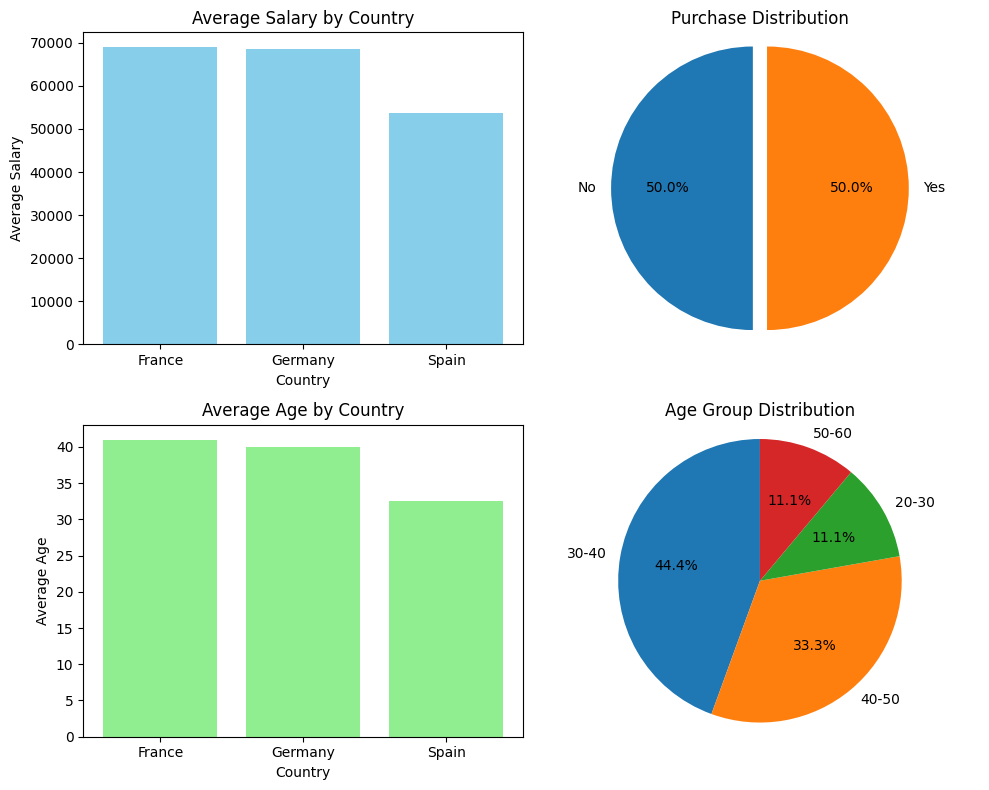

In [60]:
# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))  # 2 rows, 2 columns

# Bar plot for average salary by country
average_salary = df.groupby('Country')['Salary'].mean()
axs[0, 0].bar(average_salary.index, average_salary.values, color='skyblue')
axs[0, 0].set_title('Average Salary by Country')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Average Salary')

# Pie chart for distribution of purchases
purchase_counts = df['Purchased'].value_counts()
axs[0, 1].pie(purchase_counts, labels=purchase_counts.index,explode = [0,0.1], autopct='%1.1f%%', startangle=90)
axs[0, 1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
axs[0, 1].set_title('Purchase Distribution')

# Bar plot for average age by country
average_age = df.groupby('Country')['Age'].mean()
axs[1, 0].bar(average_age.index, average_age.values, color='lightgreen')
axs[1, 0].set_title('Average Age by Country')
axs[1, 0].set_xlabel('Country')
axs[1, 0].set_ylabel('Average Age')

# Pie chart for age group distribution
age_bins = [20, 30, 40, 50, 60]
age_labels = ['20-30', '30-40', '40-50', '50-60']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age Group'].value_counts()
axs[1, 1].pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90)
axs[1, 1].axis('equal')
axs[1, 1].set_title('Age Group Distribution')

# Adjust layout
plt.tight_layout()
plt.show()

## a. Handling Missing data
### 1. Removing Missing Data
<b>Drop Rows:</b> If the number of missing values is small and not critical, you can simply remove the rows with missing data.
### 2. Imputation 
<b>a)  Mean/Median/Mode Imputation:</b> Fill missing values with the mean, median, or mode of the respective column.<br>
<b>b)  Constant Value Imputation:</b> Fill missing values with a specific constant value (e.g., 0, "Unknown").
### 3. Interpolation
<b>a)  Linear Interpolation:</b> This method estimates missing values based on the values before and after the missing data points.<br>
<b>b)  Time-based Interpolation: </b>For time series data, you can use methods like forward fill or backward fill.

In [29]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Salary'].fillna(df['Salary'].median(),inplace=True)
df

,Country,Age,Salary,Purchased
0,France,44.000000,72000.0,No
1,Spain,27.000000,48000.0,Yes
2,Germany,30.000000,54000.0,No
3,Spain,38.000000,61000.0,No
4,Germany,40.000000,61000.0,Yes
5,France,35.000000,58000.0,Yes
6,Spain,38.777778,52000.0,No
7,France,48.000000,79000.0,Yes
8,Germany,50.000000,83000.0,No
9,France,37.000000,67000.0,Yes


In [6]:
null_counts = df.isnull().sum()
print(null_counts)


Country      0
Age          0
Salary       0
Purchased    0
dtype: int64


## b. Handling Categorical data
### 1. Encoding Categorical Variables
<b>a)   Label Encoding:</b>Converts each category into a unique integer. This is useful for ordinal data where the order matters.<br>
<b>b)   One-Hot Encoding:</b>Converts categorical variables into binary vectors. Each category becomes a new column with 1s and 0s indicating the presence of each category(get_dummies).<br>
### 2. Using Scikit-Learn’s ColumnTransformer
You can automate preprocessing for different types of features using ColumnTransformer, which applies different transformations to specific columns.

In [19]:
ct = ColumnTransformer(
    transformers=[
        ('country_encoder', OneHotEncoder(), ['Country']),
        ('Purchased_encoder', OneHotEncoder(), ['Purchased'])
    ],
    remainder='passthrough'  # This keeps the other columns unchanged
)

# Fit and transform the data
transformed = ct.fit_transform(df)

# Get feature names
country_names = ct.named_transformers_['country_encoder'].get_feature_names_out(['Country'])
purchased_names = ct.named_transformers_['Purchased_encoder'].get_feature_names_out(['Purchased'])

# Combine feature names with unchanged columns
all_feature_names = list(country_names) + list(purchased_names) + ['Age', 'Salary']

# Check shapes for debugging
print(f"Transformed shape: {transformed.shape}")  # Should print (10, 5)
print(f"Number of feature names: {len(all_feature_names)}")  # Should print 5

# Create a new DataFrame with transformed data
transformed_df = pd.DataFrame(transformed, columns=all_feature_names)

print(transformed_df)

Transformed shape: (10, 7)
Number of feature names: 7
   Country_France  Country_Germany  Country_Spain  Purchased_No  \
0             1.0              0.0            0.0           1.0   
1             0.0              0.0            1.0           0.0   
2             0.0              1.0            0.0           1.0   
3             0.0              0.0            1.0           1.0   
4             0.0              1.0            0.0           0.0   
5             1.0              0.0            0.0           0.0   
6             0.0              0.0            1.0           1.0   
7             1.0              0.0            0.0           0.0   
8             0.0              1.0            0.0           1.0   
9             1.0              0.0            0.0           0.0   

   Purchased_Yes        Age   Salary  
0            0.0  44.000000  72000.0  
1            1.0  27.000000  48000.0  
2            0.0  30.000000  54000.0  
3            0.0  38.000000  61000.0  
4            

In [34]:
## Using LabelEncoder
label_encoder = LabelEncoder()

transform = label_encoder.fit_transform(df['Country'])
transform_df = pd.DataFrame(transform, columns=['Country_Encoded'])

transform1 = label_encoder.fit_transform(df['Purchased'])
transform_df1 = pd.DataFrame(transform1, columns=['Purchased_Encoded'])

# Combine with the original DataFrame if necessary
df_transformed = pd.concat([df, transform_df,transform_df1], axis=1)
df_transformed.drop(['Country','Purchased'],axis=1,inplace=True)
df_transformed

,Age,Salary,Country_Encoded,Purchased_Encoded
0,44.000000,72000.0,0,0
1,27.000000,48000.0,2,1
2,30.000000,54000.0,1,0
3,38.000000,61000.0,2,0
4,40.000000,61000.0,1,1
5,35.000000,58000.0,0,1
6,38.777778,52000.0,2,0
7,48.000000,79000.0,0,1
8,50.000000,83000.0,1,0
9,37.000000,67000.0,0,1


### ploting basic graphs

## c. Split the dataset into training set and test set

In [36]:
# Features (X) and target (y)
X = df_transformed[['Country_Encoded', 'Age', 'Salary']]  # Independent variables (features)
y = df_transformed['Purchased_Encoded']                   # Dependent variable (target)

# Splitting the dataset into training and test sets
# 80% training, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Output to verify the splits
print("Training set (X_train):")
print(X_train)
print("\nTest set (X_test):")
print(X_test)

print("\nTraining labels (y_train):")
print(y_train)
print("\nTest labels (y_test):")
print(y_test)

Training set (X_train):
   Country_Encoded        Age   Salary
5                0  35.000000  58000.0
0                0  44.000000  72000.0
7                0  48.000000  79000.0
2                1  30.000000  54000.0
9                0  37.000000  67000.0
4                1  40.000000  61000.0
3                2  38.000000  61000.0
6                2  38.777778  52000.0

Test set (X_test):
   Country_Encoded   Age   Salary
8                1  50.0  83000.0
1                2  27.0  48000.0

Training labels (y_train):
5    1
0    0
7    1
2    0
9    1
4    1
3    0
6    0
Name: Purchased_Encoded, dtype: int32

Test labels (y_test):
8    0
1    1
Name: Purchased_Encoded, dtype: int32


## d. Feature scaling
Feature scaling is an essential step in data preprocessing, especially for machine learning algorithms. It helps normalize the range of independent variables or features of the data, ensuring that they are on a similar scale. This can improve the performance of machine learning models, especially those based on distance metrics, such as K-Nearest Neighbors (KNN), Support Vector Machines (SVM), and Gradient Descent-based models (e.g., linear logistic regression, neural networks).<br>

<b>a)  Min-Max Scaling (Normalization):</b>Transforms features to a fixed range, typically [0, 1].<br>
<b>b)  Standardization (Z-score normalization):</b>Transforms features so that they have a mean of 0 and a standard deviation of 1.<br>
<b>c)  Robust Scaling:</b>Similar to standardization but uses the median and interquartile range (IQR) instead of mean and standard deviation, which makes it more robust to outliers.

In [55]:
stsc = StandardScaler()
X_train_scaled = stsc.fit_transform(X_train)
X_test_scaled = stsc.fittransform(X_test)  # Use 'transform' instead of 'fit_transform' for test data
print(X_train_scaled)
print(X_test_scaled)

[[-0.90453403 -0.7529426  -0.58321184]
 [-0.90453403  1.00845381  1.04978132]
 [-0.90453403  1.79129666  1.8662779 ]
 [ 0.30151134 -1.73149616 -1.04978132]
 [-0.90453403 -0.36152118  0.46656947]
 [ 0.30151134  0.22561096 -0.23328474]
 [ 1.50755672 -0.16581046 -0.23328474]
 [ 1.50755672 -0.01359102 -1.28306606]]
[[ 0.30151134  2.18271808  2.33284737]
 [ 1.50755672 -2.3186283  -1.74963553]]


In [61]:
mima = MinMaxScaler()
stsc = StandardScaler()
X_train_scaled = mima.fit_transform(X_train)
X_test_scaled = mima.fit_transform(X_test)
print(X_train_scaled)
print(X_test_scaled)


[[0.         0.27777778 0.22222222]
 [0.         0.77777778 0.74074074]
 [0.         1.         1.        ]
 [0.5        0.         0.07407407]
 [0.         0.38888889 0.55555556]
 [0.5        0.55555556 0.33333333]
 [1.         0.44444444 0.33333333]
 [1.         0.48765432 0.        ]]
[[0. 1. 1.]
 [1. 0. 0.]]
